In [1]:
#imports i think i might need
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 

from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mason_functions as mf
import warnings
warnings.filterwarnings('ignore')

# Evaluate Exercises

## Exercise I
Load the tips dataset from either pydataset or seaborn.

In [2]:
#load
tips = sns.load_dataset('tips')

In [3]:
#fire
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#yuh
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Exercise II
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

In [5]:
#from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
#model = LinearRegression().fit(X, y)
#predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the tips dataset.

In [6]:
def split_data(df):
    '''
    Takes in a dataset and returns the train, validate, and test subset dataframes.
    Dataframe size for my test set is .2 or 20% of the original data. 
    Validate data is 30% of my training set, which is 24% of the original data. 
    Training data is 56% of the original data.
    '''
    
    #get my training and test data sets defined, stratify my target variable
    train, test = train_test_split(df, test_size = .2, random_state = 421)
    
    #get my validate set from the training set, stratify target variable again
    train, validate = train_test_split(train, test_size = .3, random_state = 421)
    
    #return the 3 dataframes
    return train, validate, test

In [7]:
#define categorical and quantitative variables
cat_vars = ['sex', 'smoker', 'day', 'time']
quant_vars = ['total_bill', 'size']

In [8]:
#make dummies for linear regression model
dummy_df = pd.get_dummies(tips[cat_vars], dummy_na = False, drop_first = True)

In [9]:
#mira, guey
dummy_df.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


In [10]:
#concatenate dataframes so i get what i want
lr_df = pd.concat([tips.drop(columns = cat_vars), dummy_df], axis = 1)

In [11]:
#zigazag-uh
lr_df.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [12]:
#split
train, validate, test = split_data(lr_df)

In [13]:
#define X and y for the model
X_train = train.drop(columns = 'tip')
y_train = train.tip

X_validate = validate.drop(columns = 'tip')
y_validate = validate.tip

X_test = test.drop(columns = 'tip')
y_test = test.tip

In [14]:
#is this my baseline?
train.tip.mean()

3.0555882352941177

In [15]:
#this is my baseline?
train.tip.median()

3.0

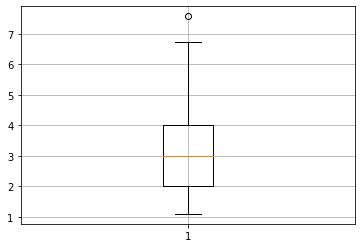

In [16]:
#what does the distribution look like, anyway?
plt.boxplot(train.tip)
plt.grid(True);

In [17]:
#baseline prediction
baseline = train.tip.median()
train['baseline'] = train.tip.median()

In [18]:
#create model
lm = LinearRegression()

#fit model
lm.fit(X_train, y_train)

#generate predictions
train['y_hat'] = lm.predict(X_train)
train

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,baseline,y_hat
97,12.03,1.50,2,0,0,1,0,0,1,3.0,2.465797
20,17.92,4.08,2,0,1,0,1,0,1,3.0,2.621687
40,16.04,2.24,3,0,1,0,1,0,1,3.0,2.791335
38,18.69,2.31,3,0,1,0,1,0,1,3.0,2.996296
42,13.94,3.06,2,0,1,0,0,1,1,3.0,2.441032
...,...,...,...,...,...,...,...,...,...,...,...
47,32.40,6.00,4,0,1,0,0,1,1,3.0,4.498907
124,12.48,2.52,2,1,1,0,0,0,0,3.0,2.364094
140,17.47,3.50,2,1,1,0,0,0,0,3.0,2.750039
163,13.81,2.00,2,0,1,0,0,1,1,3.0,2.430977


In [21]:
#generate a column holding respective residuals
train['residual'] = train.tip - train.y_hat
train['baseline_residual'] = train.baseline - train.y_hat

In [22]:
#at a glance
train.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,baseline,y_hat,residual,baseline_residual
97,12.03,1.50,2,0,0,1,0,0,1,3.0,2.465797,-0.965797,0.534203
20,17.92,4.08,2,0,1,0,1,0,1,3.0,2.621687,1.458313,0.378313
40,16.04,2.24,3,0,1,0,1,0,1,3.0,2.791335,-0.551335,0.208665
38,18.69,2.31,3,0,1,0,1,0,1,3.0,2.996296,-0.686296,0.003704
42,13.94,3.06,2,0,1,0,0,1,1,3.0,2.441032,0.618968,0.558968


## Exercise III
Plot the residuals for the linear regression model that you made.

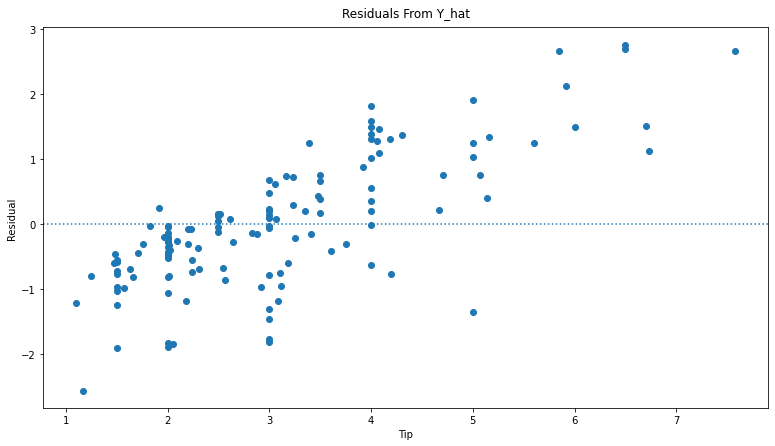

In [25]:
#create figure
plt.figure(figsize = (13, 7))

#scatter!
plt.scatter(train.tip, train.residual)
plt.axhline(y = 0, ls = ':')
plt.title('Residuals From Y_hat', pad = 11)
plt.xlabel('Tip')
plt.ylabel('Residual');

## Exercise IV
Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

## Exercise V
Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

## Exercise VI
Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

## Exercise VII
What is the amount of variance explained in your model?

## Exercise VIII
Is your model better than the baseline model?

## Exercise IX

Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
* sum of squared errors (SSE)
* explained sum of squares (ESS)
* total sum of squares (TSS)
* mean squared error (MSE)
* root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

## Exercise X
Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.